# Backpropagation

Here is a quick representation of the backpropagation algorithm for the simple two node network.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(123)

##  Steps to backpropagation

We outlined 4 steps to perform backpropagation,

   1. Choose random initial weights.
   2. Fix input at desired value, and calculate output.
   3. Update the weights.
   4. Repeat steps 2 & 3 many times.

Let's now implement these steps.

### First, let's generate some data using known values for the weights

In [31]:
def sigmoid(x):
    return 1/(1+np.exp(-x))     # Define the sigmoid anonymous function.

def feedforward(w, s0):         # Define feedforward solution.
    x1 = w[0]*s0                # ... activity of first neuron,
    s1 = sigmoid(x1)            # ... output of first neuron,
    x2 = w[1]*s1                # ... activity of second neuron,
    s2 = sigmoid(x2)            # ... output of second neuron,
    out= w[2]*s2                # Output of neural network.
    return out,s1,s2            #printing or plugging feedforward returns these values hehehe 

In [32]:
# Create fake data
w_true  = [1,-2,3]                      # Set true weights
out_true,in_true = [], []
K = 100000
for k in np.arange(K):                  # Generate K samples, 
    s0 = np.random.randn(1)             # ... with random input,
    out,s1,s2= feedforward(w_true, s0)  # ... compute the output,
    out_true = np.append(out_true, out) # ... and save it.
    in_true  = np.append(in_true,  s0)  # ... also save the input.

### Look at the list of inputs (s0) and outputs (out).
These are the data we'll use to train the neural network through back propagation.

In [33]:
print(np.transpose([in_true, out_true]))

[[-1.21000771  1.16138496]
 [ 1.53439329  0.48523701]
 [ 0.85386605  0.59213789]
 ...
 [-0.27515292  0.88996042]
 [ 1.48550907  0.49115972]
 [-0.66458155  1.00917071]]


### Now, let's train the neural network with these (inputs,outputs) data.

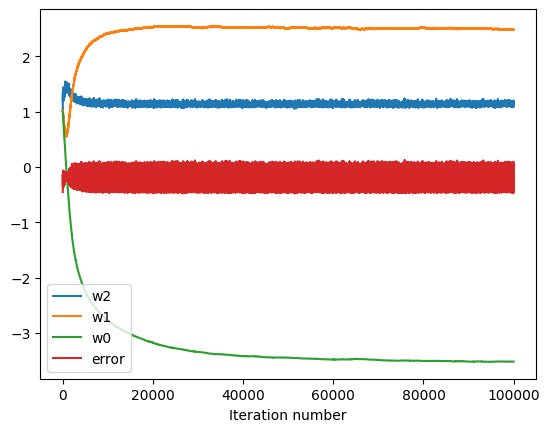

In [38]:
w     = [1,1,1]                  # Choose initial values for the weights.
alpha = 0.1                     # Set the learning constant.

results = np.zeros([K,4])        # Define a variable to hold the results of each iteration.    

for k in np.arange(K):
    s0     = in_true[k]          # Define the input,
    target = out_true[k]         # ... and the target output.
    
    #Step 2. Calculate feedforward solution to get output.
    out,s1,s2    = feedforward(w, s0) #run our feedforward network using our function
    
    #Step 3. Update the weights.
    w[2] = w[2] - alpha*(out-target)*s2 #with our equations we discussed in the backprop ppt
    w[1] = w[1] - alpha*(out-target)*(w[2]*s2*(1-s2)*s1)
    w[0] = w[0] - alpha*(out-target)*(w[2]*s2*(1-s2)*w[1])*(s1*(1-s1)*s0)
    
    # Save the results of this step. --------------------------------------
    results[k,:] = [w[0],w[1],w[2],  out]
    # Here we save the 3 weights, the neural network output.

plt.clf()
plt.plot(results[:,2], label='w2')
plt.plot(results[:,1], label='w1')
plt.plot(results[:,0], label='w0')
plt.plot(results[:,3]-target, label='error') #this is plotting the error that is calculated at every single step 
plt.legend()                       #Include a legend,
plt.xlabel('Iteration number');    #... and axis label.
#plt.xlim([K-1000, K])
plt.show()

In [35]:
# Print the true and NN weights
print(w_true)
print(results[-1,0:3])

[1, -2, 3]
[-2.78171455  2.39951419  1.13942042]


This things above are our true weights 

In [36]:
# Test the NN
s0 = 0.5
print('True weights output:', feedforward(w_true, s0)[0])
print('  NN weights output:', feedforward(w,      s0)[0])

True weights output: 0.6707429458439483
  NN weights output: 0.7033775995377892
